In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load CSV

- Load the CSV file containing the scores data
- Filter the data to include only the "Foundations of ML" course

In [3]:
df = pd.read_csv('data/raw/scores.csv')
df = df[df['CourseName'] == 'Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


### Load features and scale

In [4]:
def min_max_scale(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    X_scaled = (X - X_min) / (X_max - X_min)
    return X_scaled, X_min, X_max

In [5]:
X_attendance = df['Attendance'].values
X_attendance_scaled, X_attendance_min, X_attendance_max = min_max_scale(X_attendance.reshape(-1, 1))

X_study_hours = df['TotalHours'].values
X_study_hours_scaled, X_study_hours_min, X_study_hours_max = min_max_scale(X_study_hours.reshape(-1, 1))

X_assignments = df['AssignmentsCompleted'].values
X_assignments_scaled, X_assignments_min, X_assignments_max = min_max_scale(X_assignments.reshape(-1, 1))

X_quiz = df['PeerReviewScore'].values
X_quiz_scaled, X_quiz_min, X_quiz_max = min_max_scale(X_quiz.reshape(-1, 1))

X_participation = df['HackathonParticipation'].values
X_participation_scaled, X_participation_min, X_participation_max = min_max_scale(X_participation.reshape(-1, 1))

Y = df['CapstoneScore'].values
Y_scaled, Y_min, Y_max = min_max_scale(Y.reshape(-1, 1))

In [6]:
X = np.column_stack([
    np.ones(len(df)),
    X_attendance_scaled.flatten(),
    X_study_hours_scaled.flatten(),
    X_assignments_scaled.flatten(),
    X_quiz_scaled.flatten(),
    X_participation_scaled.flatten()
])

y = Y_scaled.flatten()

### Util functions

- format_value_for_printing: Format values for better readability

In [7]:
def format_value_for_printing(value):
    if np.isinf(value):
        return "∞"
    elif np.isnan(value):
        return "NaN"
    else:
        return f"{value:.4f}"

### Analyzing Functions

- predict: Predict the output
- compute_cost: Calculate the cost function (Mean Squared Error)
- compute_gradients: Calculate partial derivatives for both parameters
- gradient_descent: Implement parameter optimization

In [8]:
# Constants
CONVERGENCE_THRESHOLD = 1e-6

In [9]:
def predict(X, beta):
    return X @ beta

def compute_cost(X, y, beta):
    m = len(y)
    predictions = X @ beta
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def compute_gradients(X, y, beta):
    m = len(y)
    predictions = X @ beta
    gradients = (1/m) * X.T @ (predictions - y)
    return gradients

def gradient_descent(X, y, learning_rate):
    n_features = X.shape[1]
    n_iterations = 100000
    beta = np.zeros(n_features)
    cost_history = []
    converged = False

    for i in range(n_iterations):
        cost = compute_cost(X, y, beta)
        cost_history.append(cost)
        gradients = compute_gradients(X, y, beta)
        beta = beta - learning_rate * gradients

        # Check for convergence
        if i > 10:
            change = abs(cost_history[-1] - cost_history[-10])
            if change < CONVERGENCE_THRESHOLD:
                print(f"Converged at {i}")
                converged = True
                break

        # Check for non convergence
        if np.isinf(cost):
            print("Cost diverged. Exiting...")
            break

    return beta, cost_history, converged

### Prediction

In [10]:
beta, costs, converged = gradient_descent(X, y, learning_rate=0.00001)
predictions = predict(X, beta)

Converged at 97396


In [11]:
print("\n" + "="*130)
print("LEARNING RATE ANALYSIS SUMMARY")
print("="*130)
print(f"{'Learning Rate':<15} {'β₀':<12} {'β₁':<12} {'β₂':<12} {'β₃':<12} {'β₄':<12} {'β₅':<12} {'Final Cost':<12} {'Converged':<10} {'Iterations':<12}")
print("-"*130)

print(f"{'0.00001':<15} {format_value_for_printing(beta[0]):<12} {format_value_for_printing(beta[1]):<12} {format_value_for_printing(beta[2]):<12} {format_value_for_printing(beta[3]):<12} {format_value_for_printing(beta[4]):<12} {format_value_for_printing(beta[5]):<12} {format_value_for_printing(costs[-1]):<12} {str(converged):<10} {len(costs):<12}")


LEARNING RATE ANALYSIS SUMMARY
Learning Rate   β₀           β₁           β₂           β₃           β₄           β₅           Final Cost   Converged  Iterations  
----------------------------------------------------------------------------------------------------------------------------------
0.00001         0.1878       0.0861       0.1597       0.0934       0.0983       0.0594       0.0239       True       97397       


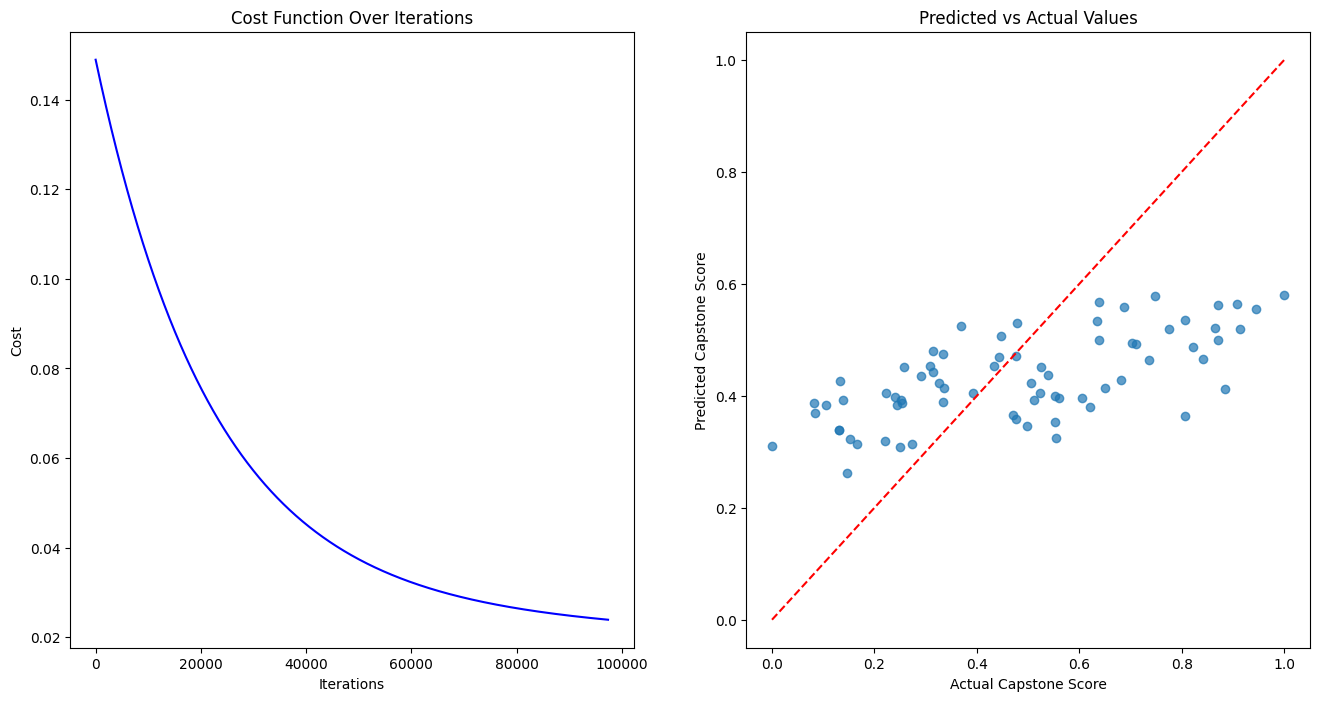

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

ax = axes[0]
ax.plot(costs, label='Cost Function', color='blue')
ax.set_title('Cost Function Over Iterations')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

ax = axes[1]
plt.scatter(Y_scaled, predictions, alpha=0.7)
min_val = min(Y_scaled.min(), predictions.min())
max_val = max(Y_scaled.max(), predictions.max())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
ax.set_xlabel('Actual Capstone Score')
ax.set_ylabel('Predicted Capstone Score')
ax.set_title('Predicted vs Actual Values')

plt.show()

### Evaluation metrics

In [13]:
def calculate_evaluation_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(mse)
    r_squared = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))

    return mse, mae, rmse, r_squared

In [14]:
print("\n" + "="*70)
print("EVALUATION SUMMARY")
print("="*70)
print(f"{'Learning Rate':<15} {'MSE':<12} {'MAE':<12} {'RMSE':<12} {'R²':<12}")
print("-"*70)

if converged:
    mse, mae, rmse, r_squared = calculate_evaluation_metrics(y, predictions)
    print(f"{'0.00001':<15} {format_value_for_printing(mse):<12} {format_value_for_printing(mae):<12} {format_value_for_printing(rmse):<12} {format_value_for_printing(r_squared):<12}")
else:
    print(f"{'0.00001':<15} {'Diverged':<12} {'Diverged':<12} {'Diverged':<12} {'Diverged':<12}")


EVALUATION SUMMARY
Learning Rate   MSE          MAE          RMSE         R²          
----------------------------------------------------------------------
0.00001         0.0478       0.1886       0.2186       0.2717      
